#

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

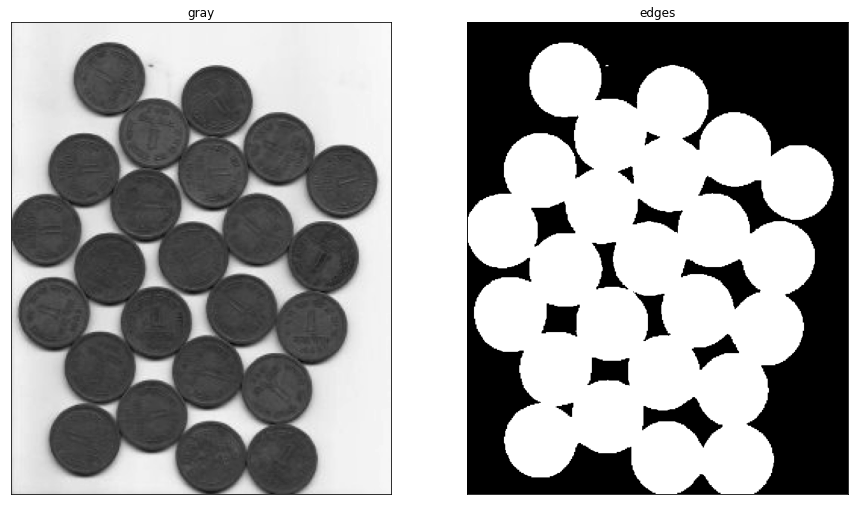

In [3]:
plt.figure(figsize=(15,30))
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

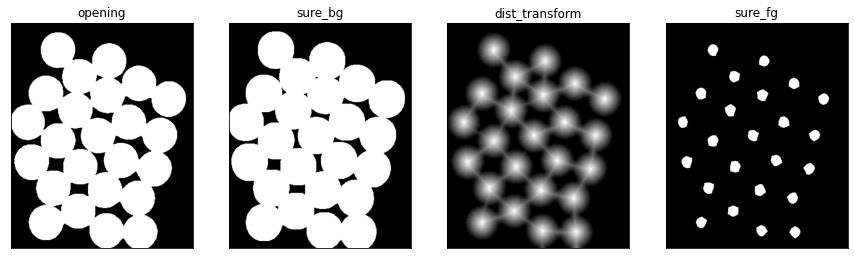

In [5]:
plt.figure(figsize=(15,30))
plt.subplot(141),plt.imshow(opening,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(sure_bg,cmap = 'gray')
plt.title('sure_bg'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(dist_transform,cmap = 'gray')
plt.title('dist_transform'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(sure_fg,cmap = 'gray')
plt.title('sure_fg'), plt.xticks([]), plt.yticks([])
plt.show()

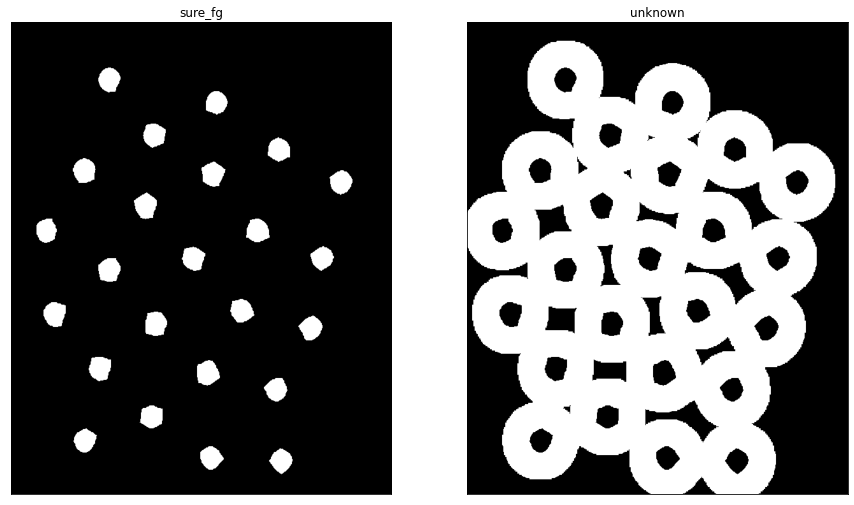

In [6]:
plt.figure(figsize=(15,30))
plt.subplot(121),plt.imshow(sure_fg,cmap = 'gray')
plt.title('sure_fg'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(unknown,cmap = 'gray')
plt.title('unknown'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [8]:
markers.shape

(742, 598)

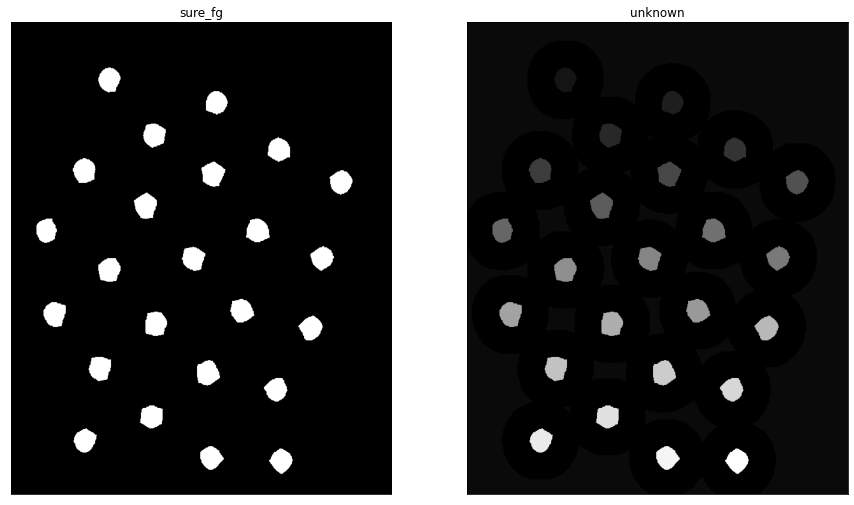

In [9]:
plt.figure(figsize=(15,30))
plt.subplot(121),plt.imshow(sure_fg,cmap = 'gray')
plt.title('sure_fg'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(markers,cmap = 'gray')
plt.title('unknown'), plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

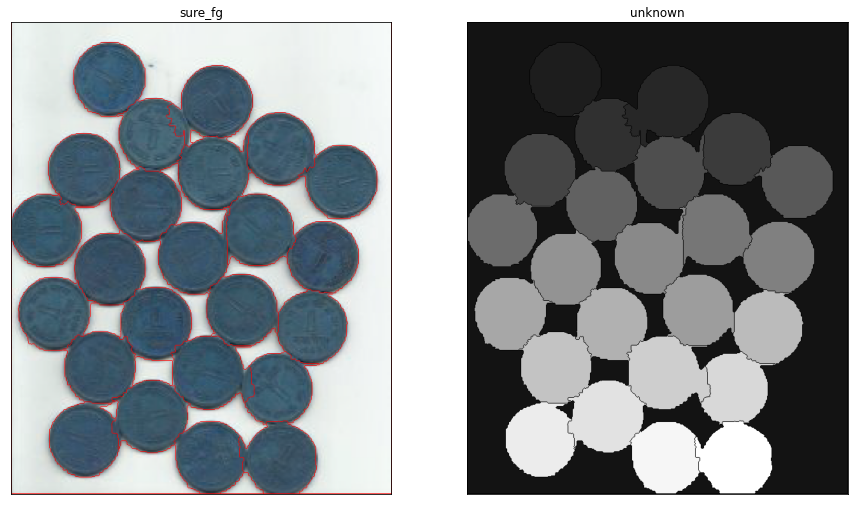

In [11]:
plt.figure(figsize=(15,30))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('sure_fg'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(markers,cmap = 'gray')
plt.title('unknown'), plt.xticks([]), plt.yticks([])
plt.show()